# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
# Libraries to be imported
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from numpy.random import seed
from numpy.random import random
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

In [2]:
data_r = pd.io.stata.read_stata('C:/Users/jlpar/Documents/Springboard Curriculum/Projects/Unit 8/us_job_market_discrimination.dta')

In [3]:
data_r.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,...,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,3.618480,3.661396,7.842916,0.052772,0.411499,0.097125,0.448049,215.637782,3.481520,0.559548,...,0.106776,0.437166,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.714997,1.219126,5.044612,0.223601,0.492156,0.296159,0.497345,148.127551,2.038036,0.496492,...,0.308866,0.496083,0.259649,0.275854,0.171677,0.278932,0.410141,0.442847,0.361773,0.371308
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,44.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
data_r.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [5]:
data_r.columns

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

In [46]:
data_r.shape

(4870, 65)

In [6]:
type(data_r)

pandas.core.frame.DataFrame

In [8]:
import pandas_profiling as pp
pp.ProfileReport(data_r)

Number of variables,65
Number of observations,4870
Total Missing (%),11.0%
Total size in memory,1.3 MiB
Average record size in memory,270.0 B
Numeric,22
Categorical,10
Boolean,32
Date,0
Text (Unique),0
Rejected,1


Your answers to Q1 and Q2 
This dataset has a total of 4870 rows of data and is a large dataset and more than the 30 needed for the Central Limit Theory as discussed in the tutorials.  The resumes were "randomly assigned to identical resumes for black-sounding or white-sounding names for this study. The two sided Z test will be used to test the null hypothesis for this study.  

The null and altenative hypothesis for question two are as follows;
Ho or the null hypothesis is the no difference hypothesis or states that there is no difference between the the rate of call backs for the two races studied in this study.

Ha or the alternative hypothesis states that there is a difference in the proportion of callbacks for both races and it is not an equal probability for this study.  

In [7]:
### Python code generted to answer the questions for number 3
## Computing the arrays for black and white applicants
black = data_r[(data_r.race == 'b')]
white = data_r[(data_r.race == 'w')]

In [8]:
## Printing the rows based by race for black applicants
black.head(2)

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,


In [9]:
## Printing the rows based by race for the white applicants
white.head(2)

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,


In [10]:
data_r.groupby(['race','call']).size().apply(lambda x: x/2435.).unstack()

call,0.0,1.0
race,,
b,0.935524,0.064476
w,0.903491,0.096509


In [11]:
## Compute the total number of calls selected per race and the totals for both races
c_b = len(black[black.call==1])
c_w = len(white[white.call==1])
c_tot = c_b+c_w

In [12]:
## Printout of the totals for the races in this study
print('Total number of Black Applicants', len(black.call))
print('Total number of White Applicants', len(white.call))
print('Total number of callbacks for Black Applicants', c_b)
print('Total number of callbacks for White Applicants', c_w)
print('Total number of callbacks for Both races', c_tot)

Total number of Black Applicants 2435
Total number of White Applicants 2435
Total number of callbacks for Black Applicants 157
Total number of callbacks for White Applicants 235
Total number of callbacks for Both races 392


In [47]:
## Proportion of callbacks based on race
p_b = c_b/len(black)
p_w = c_w/len(white)
diff_prop = abs(p_b - p_w)

print('Proportion of callbacks for Blacks', round(p_b, 5))
print('Proportion of callbacks for Whites', round(p_w, 5))
print('Difference in Pooled Proportions', round(diff_prop, 5))

Proportion of callbacks for Blacks 0.06448
Proportion of callbacks for Whites 0.09651
Difference in Pooled Proportions 0.03203


In [14]:
## Calculating the Standard Error of the differences between the callbacks
## This will be the square root of the probability times 1 minus the probability for each race,
## divided by the total number of applicants for each race in this study

se_b=(p_b*(1-p_b)/len(black))
se_w=(p_w*(1-p_w)/len(white))

se=np.sqrt(se_b+se_w)
print('Standard Error for the Differnence of the Means', round(se, 5))

Standard Error for the Differnence of the Means 0.00778


In [15]:
#Calculate the margin of error
margin_of_error = stats.norm.ppf(1-((1-0.95)/2)) * se
print(round(margin_of_error, 5))

0.01526


In [16]:
## Calculating the Upper and Lower Confidence Limit 
CL=0.95
CI_lower, CI_upper = stats.norm.interval(CL, loc=p_w-p_b, scale=se)
print('The Lower Confidence Interval is ', round(CI_lower, 5))
print('The Upper Confidence Interval is ', round(CI_upper, 5))

The Lower Confidence Interval is  0.01678
The Upper Confidence Interval is  0.04729


In [17]:
## The Z score will be the difference in the proportions divided by the stardard error
z = (abs(p_b-p_w)/se)
print('The Z_Value is:', round(z, 5))

The Z_Value is: 4.11555


In [18]:
## Calculating the p value 
p_val=(1-stats.norm.cdf(z))*2
print('p value ', round(p_val, 5))

p value  4e-05


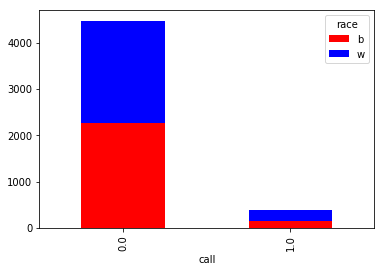

In [19]:
## stacked barplot looking at calls for race in this study. 
race = pd.crosstab(data_r['call'], data_r['race'])
race.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
plt.show()

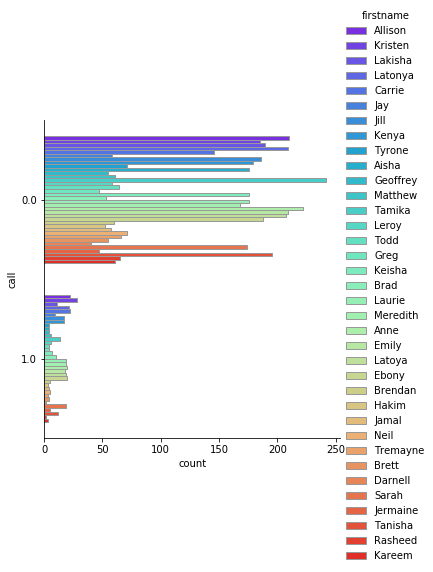

In [20]:
## Barplot and Countplot in Seaborn looking at first names based on calls
sns.catplot(y="call", 
            hue="firstname", 
            kind="count",
            palette="rainbow", 
            edgecolor=".6",
            data=data_r);

<div class="span5 alert alert-success">
<p> Your answe rs to Q4 and Q5 here </p>
</div>

In the EDA phase of this project several histograms, barplots and countplot visualizations were conducted to see if there was 
any noticable differences in the distribution of the data between the attributes found in this study. The plots did not show any noticible differences between the race of an individual and the callbacks for submitted resumes. 

The objectives of this assignment were completed to determine if there were any signficant differnces between the call backs for the black and white population proportions in this study.  A two tailed z test with CI and p values were calculated to determine if these values were significant and the null hypothesis could be rejected and the alternative accepted. The CI for the proportion of black individuals compared to white individuals that were called back was 0.0168 for the lower and 0.0473 for the upper limit at a 95% Confidence Level.  The z value was 4.1155 and the p value was 0.00004 and these results can be seen in the previous cells for this assignment.  The large Z Score of 4.155 and the small p-value suggests something unsualy and not due to chance is going on with the number of callbacks for the race attribute.  This small p-value suggests the null hypothesis can be rejected in favor of the alternative hypothesis because these values fall outside of the normal range of distribution for this study.  

Question 5) Does this analysis mean that callback for race/name mean is the MOST important parameter in this
study.  The answer would be; we cannot rule out all the other factors from the dataset which has a total of 65 attributes that may have one or more factors affecting the callbacks for this study.  Lets take a look at several other factors by graphing the differences below and these are sex, empholes and military response for callbacks.  Just looking at the attribute for sex and empholes, it appears these have more call backs if you are female and are listed as an emphole for this dataset.  If you have military experience, there is a very limited chance of getting a callback for the jobs listed in this study.  

The two tailed Z test was calculated for sex with a 99 % Confidence Interval and the the results can be seen below.  The null hypothesis is there is no difference and the alternative hypothesis states there is a significant difference in callbacks based on sex.  The same calculations were conducted as with race and the Z Score is almost twice the amount as before with a value of 8.367 and the lower and upper Confidence Limit with a 99% Confidence Interval is 0.032 and 0.061.  These results show the large z score and very low p-value suggests that the null can be rejected in favor of the alternative hypothesis.  This is another attribute along with race that needs further investigation to determine what is influencing the callback rate for these applicants based on these two attributes.  

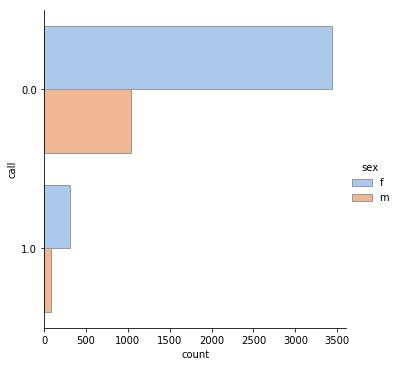

In [38]:
## Barplot and Countplot in Seaborn
sns.catplot(y="call", 
            hue="sex", 
            kind="count",
            palette="pastel", 
            edgecolor=".6",
            data=data_r);

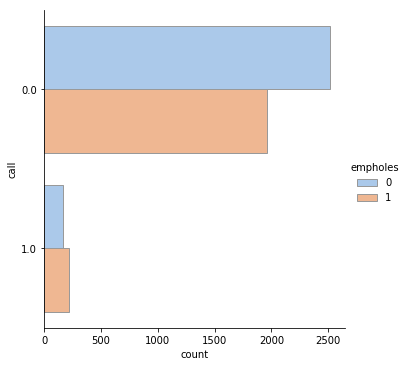

In [40]:
## Barplot and Countplot in Seaborn
sns.catplot(y="call", 
            hue="empholes", 
            kind="count",
            palette="pastel", 
            edgecolor=".6",
            data=data_r);

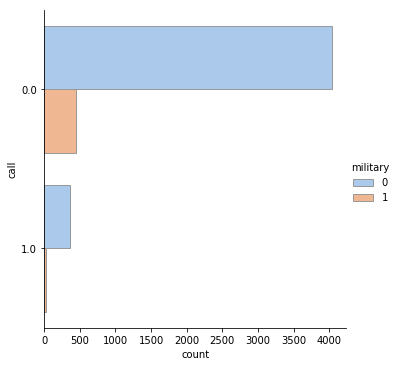

In [43]:
## Barplot and Countplot in Seaborn
sns.catplot(y="call", 
            hue="military", 
            kind="count",
            palette="pastel", 
            edgecolor=".6",
            data=data_r);

In [22]:
##########  Determining if sex is a significant factor in getting callbacks for this study.  
# Computing the arrays for female and male applicants
f = data_r[(data_r.sex == 'f')]
m = data_r[(data_r.sex == 'm')]

In [26]:
## Compute the total number of calls selected per gender and the totals for both sexes
c_f = len(f[f.call==1])
c_m = len(m[m.call==1])
s_tot = c_f+c_m

In [37]:
## Gender Probabilites for no callbacks and callbacks
data_r.groupby(['sex','call']).size().apply(lambda x: x/4870.).unstack()

call,0.0,1.0
sex,,
f,0.705749,0.063450
m,0.213758,0.017043


In [27]:
print('Total number of  Female Applicants', len(f.sex))
print('Total number of Male Applicants', len(m.sex))
print('Total number of callbacks for Female Applicants', c_f)
print('Total number of callbacks for Male Applicants', c_m)
print('Total number of callbacks for both sexes', s_tot)

Total number of  Female Applicants 3746
Total number of Male Applicants 1124
Total number of callbacks for Female Applicants 309
Total number of callbacks for Male Applicants 83
Total number of callbacks for both sexes 392


In [29]:
## Proportion of call backs based on gender
p_f = c_f/len(data_r.sex=='f')
p_m = c_m/len(data_r.sex=='m')
diff_prop_sex = abs(p_f - p_m)

print('Proportion of callbacks for Females', round(p_f, 5))
print('Proportion of callbacks for Males', round(p_m, 5))
print('Differnce in Pooled Proportions of Sexes', round(diff_prop_sex, 5))

Proportion of callbacks for Females 0.06345
Proportion of callbacks for Males 0.01704
Differnce in Pooled Proportions of Sexes 0.04641


In [31]:
## Calculating the Standard Error of the differences between the callbacks
## This will be the squareroot of the probability times 1 minus the probability for each race
## divided by the total number of applicants for each race in this study

se_f=(p_f*(1-p_f)/len(f.call))
se_m=(p_m*(1-p_m)/len(m.call))

se_s=np.sqrt(se_f+se_m)
print('Standard Error for the Difference of the Means', round(se_s, 5))

Standard Error for the Difference of the Means 0.00555


In [32]:
#Calculate the margin of error
margin_of_error = stats.norm.ppf(1-((1-0.99)/2)) * se_s
print(round(margin_of_error, 5))

0.01429


In [33]:
## Calculating the Lower and Upper Confidence Limits 
CL=0.99
CI_lower_s, CI_upper_s = stats.norm.interval(CL, loc=p_f-p_m, scale=se_s)
print(CI_lower_s)
print(CI_upper_s)

0.032118779619193266
0.060694362064584964


In [34]:
## The Z score will be the difference in the proportions divided by the stardard error
z_s = (abs(p_f-p_m)/se_s)
print('The Z_Value is:', z_s)

The Z_Value is: 8.366262019693885


In [35]:
## Calculating the p value for the normal cdf. 
p_val_s=(1-stats.norm.cdf(z_s))*2
print(p_val_s)

0.0


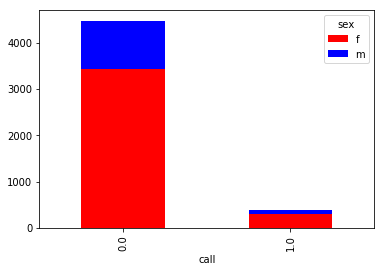

In [21]:
sex = pd.crosstab(data_r['call'], data_r['sex'])
sex.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
plt.show()